<a href="https://colab.research.google.com/github/mladbago/podstawy_sztucznej_inteligencji/blob/main/Z03_D_normal_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2-wymiarowy rozkład Normalny

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rnd
import scipy.stats as stats
from scipy.stats import multivariate_normal

# Zadanie 
Proszę wygenerować próbkę z rozkładu Normalnego
$$
m = [0,0]
$$

oraz

$$
\Sigma = [[4.40, -2.75], [-2.75,  5.50]]
$$

In [5]:
mean1 = np.array([0, 0])
cov1 = np.array([[4.40, -2.75], [-2.75,  5.50]])
X1_rv=multivariate_normal(mean1, cov1)
X = X1_rv.rvs(1000)

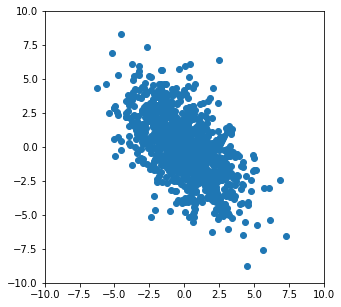

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
ax.scatter(X[:, 0], X[:, 1])
ax.set_xlim([-10,10])
ax.set_ylim([-10,10])
plt.show()

# Zadanie 
Proszę policzyć średnią oraz macierz kowariancji próbki.

In [7]:
means = X.mean(axis=0)
cov = np.cov(X.T)
print(means)
print(cov)

[ 0.04916119 -0.06785061]
[[ 4.34399202 -2.87371892]
 [-2.87371892  5.81713462]]


# Zadanie
Proszę zdefiniować zmienną losową o razkładzie zadanym na podstawie empirycznej średniej i kowariancji oraz narysować na jednym wykresie:

- próbkę
- poziomice rozkładu normalnego 

In [8]:
X2_rv=multivariate_normal(means, cov)

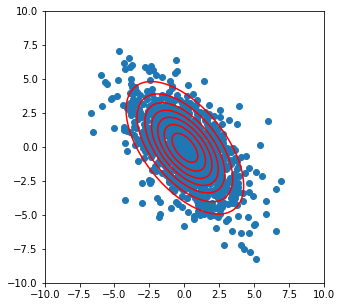

In [9]:
X = X2_rv.rvs(1000)
fig, ax = plt.subplots(figsize=(5,5))
x_axis = np.linspace(-10,10,500)
y_axis = np.linspace(-10,10,500)
x, y = np.meshgrid(x_axis,y_axis)
points = multivariate_normal(means, cov)
pos = np.dstack((x,y))
ax.scatter(X[:,0],X[:,1])
ax.contour(x, y, points.pdf(pos), colors = 'red')

# Zadanie
Policz wektory i wartości własne macierzy kowariancji. Narysuj na jednym wykresie

- próbkę
- poziomice rozkładu normalnego 
- wektory własne macierzy kowariancji 

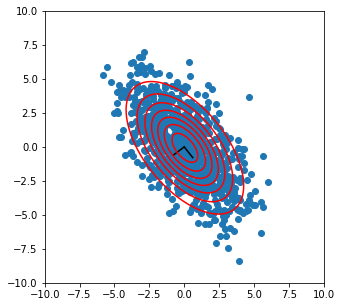

In [10]:
X = X2_rv.rvs(1000)
fig, ax = plt.subplots(figsize=(5,5))
x_axis = np.linspace(-10,10,500)
y_axis = np.linspace(-10,10,500)
x, y = np.meshgrid(x_axis,y_axis)
points = multivariate_normal(means, cov)
pos = np.dstack((x,y))

eigen_values, eigen_vectors = np.linalg.eig(cov)
ax.plot([0,eigen_vectors[0][0]],[0,eigen_vectors[1][0]],color="black")
ax.plot([0,eigen_vectors[0][1]],[0,eigen_vectors[1][1]],color="black")

ax.scatter(X[:,0],X[:,1])
ax.contour(x, y, points.pdf(pos), colors = 'red')

# Zadanie 
Proszę wygenerować próbkę na kwadracie $[0,1] \times [0,1]$.
Następnie proszę policzyć średnią oraz macierz kowariancji próbki.

Narysuj na jednym wykresie

- próbkę
- poziomice rozkładu normalnego 
- wektory własne macierzy kowariancji 

[ 0.50808451  0.5058539 ]
[-0.92741051 -0.37404512]
[[ 0.50808451  0.5058539  -0.21405639 -0.53073315]
 [ 0.50808451  0.5058539  -0.51755339  0.2087407 ]]


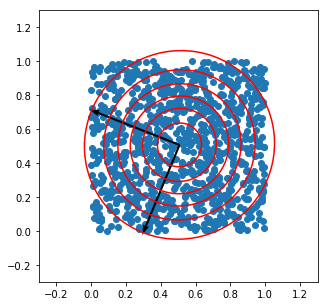

In [20]:
def normalize(v):
    norm = np.linalg.norm(v)
    if norm == 0:
       return v
    return v / norm

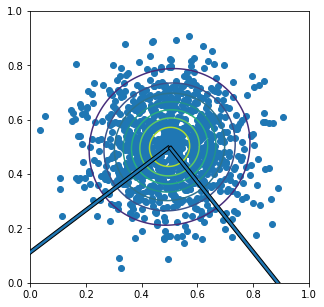

In [23]:
mean1 = np.array([0.5, 0.5])
cov1 = np.array([[0.02,0.001],[0.001,0.02]])
X1_rv=multivariate_normal(mean1, cov1)
X = X1_rv.rvs(1000)

X[X>1] -= np.random.uniform()
X[X<0] += np.random.uniform()

vals, vects = np.linalg.eig(cov)
v1 = vals[0]*normalize(eigen_vectors[:,0])
v2 = vals[1]*normalize(eigen_vectors[:,1])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
ax.scatter(X[:,0],X[:,1])

x = np.linspace(0,1,1000)
y = np.linspace(0,1,1000)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X 
pos[:, :, 1] = Y

startpoint = [0.5,0.5]
size = 0.05
plt.arrow(*startpoint,*(10*v1),zorder=10, width=size/4,head_width=size, head_length=size)
plt.arrow(*startpoint,*(10*v2),zorder=10, width=size/4,head_width=size, head_length=size)
plt.contour(X,Y,X1_rv.pdf(pos))

size2 = [0,1]
ax.set_xlim(size2)
ax.set_ylim(size2)

plt.show()